In [6]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Read Source Files

In [7]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
#
print("Train:",len(df_train))
sample_sub=pd.read_csv("sample_submission.csv")
#
df_train.head()

Train: 1117957


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


# Exploratory Data Analysis

## For EDA, please refer 

https://www.kaggle.com/code/aspillai/flood-prediction-regression-lightgbm-0-86891

In [9]:
# EXPLORATORY DATA ANALYSIS 
# Concise summary of the data¶
print(df_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [10]:
#STATISTICAL SUMMARY 
df_train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


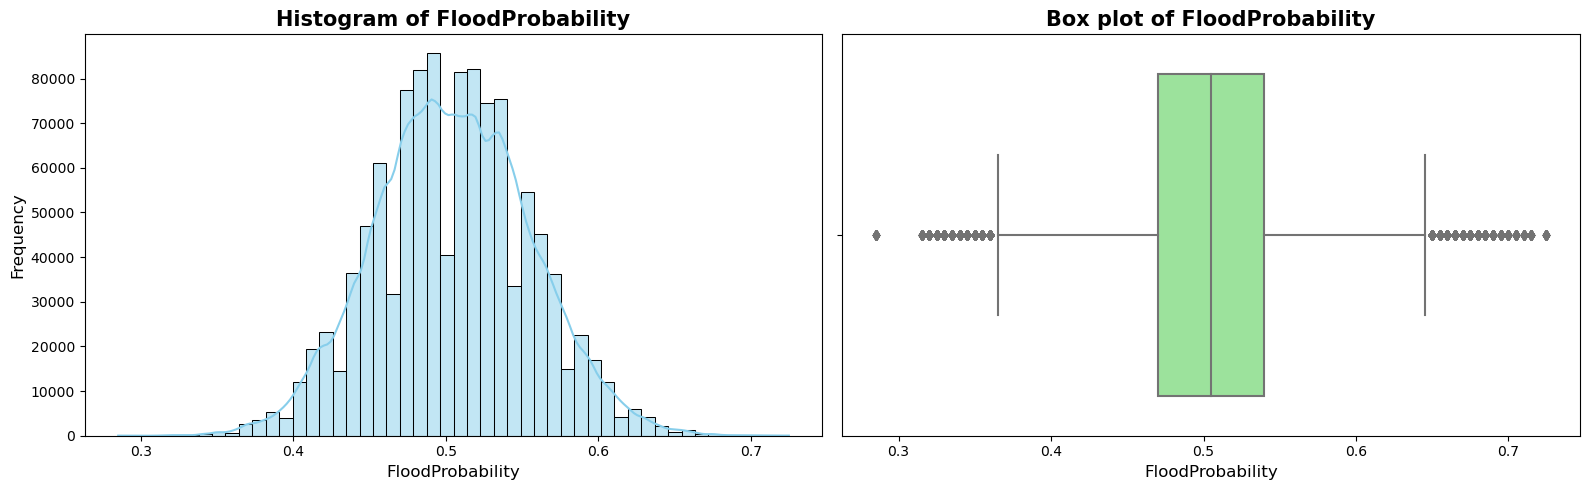

In [11]:
#PLOTS 
def plot_numerics(data):
    numeric_columns = data.columns
    # Plotting histograms and box plots for each numeric column
    for column in numeric_columns:
        _, ax = plt.subplots(1,2, figsize=(16, 5))
        ax=ax.flatten()

        # Histogram
        sns.histplot(data[column], bins=50, kde=True, color='skyblue', ax=ax[0])
        ax[0].set_title(f'Histogram of {column}', fontsize=15,fontweight='bold')
        ax[0].set_xlabel(column, fontsize=12)
        ax[0].set_ylabel('Frequency', fontsize=12)

        # Box plot
        sns.boxplot(x=data[column], color='lightgreen', ax=ax[1])
        ax[1].set_title(f'Box plot of {column}', fontsize=15,fontweight='bold')
        ax[1].set_xlabel(column, fontsize=12)

        
        plt.tight_layout()
        plt.show()
        
def get_count_plot(cat):
    ax=sns.countplot(x=df_train[cat],
                   order=df_train[cat].value_counts(ascending=False).index);
        
    abs_values = df_train[cat].value_counts(ascending=False)
    rel_values = df_train[cat].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    ax.bar_label(container=ax.containers[0], labels=lbls)
    ax.set_title("Distribution of "+cat+" Values",fontsize=16)


    plt.figure(figsize=(25, 12))
plot_numerics(df_train[['FloodProbability']])

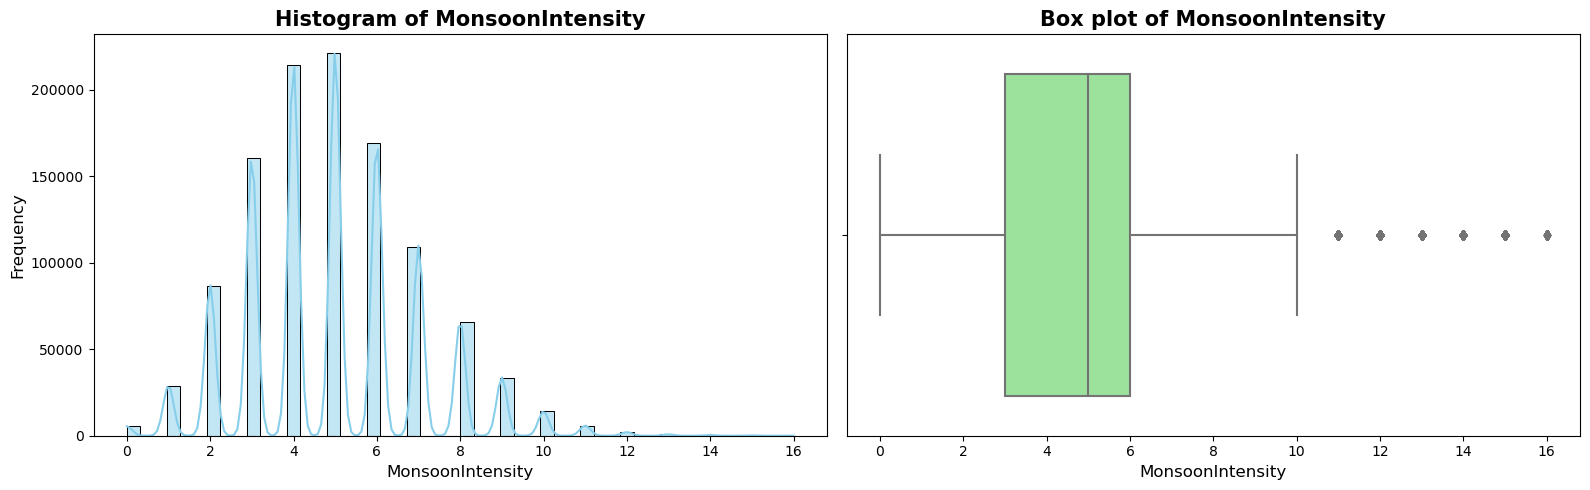

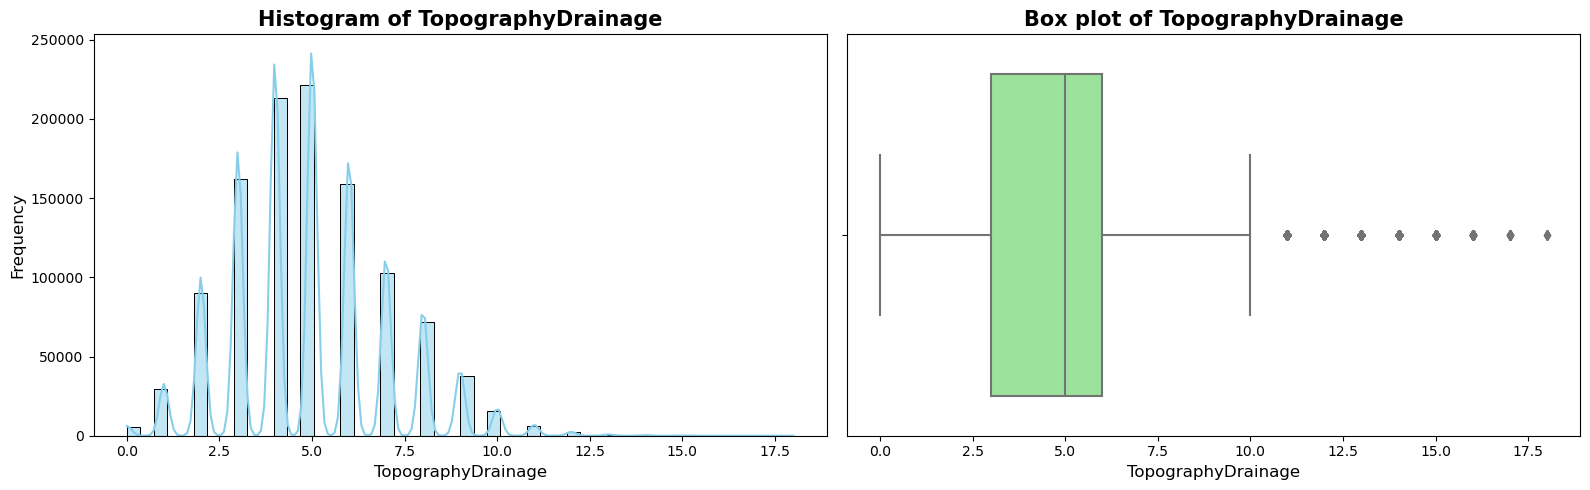

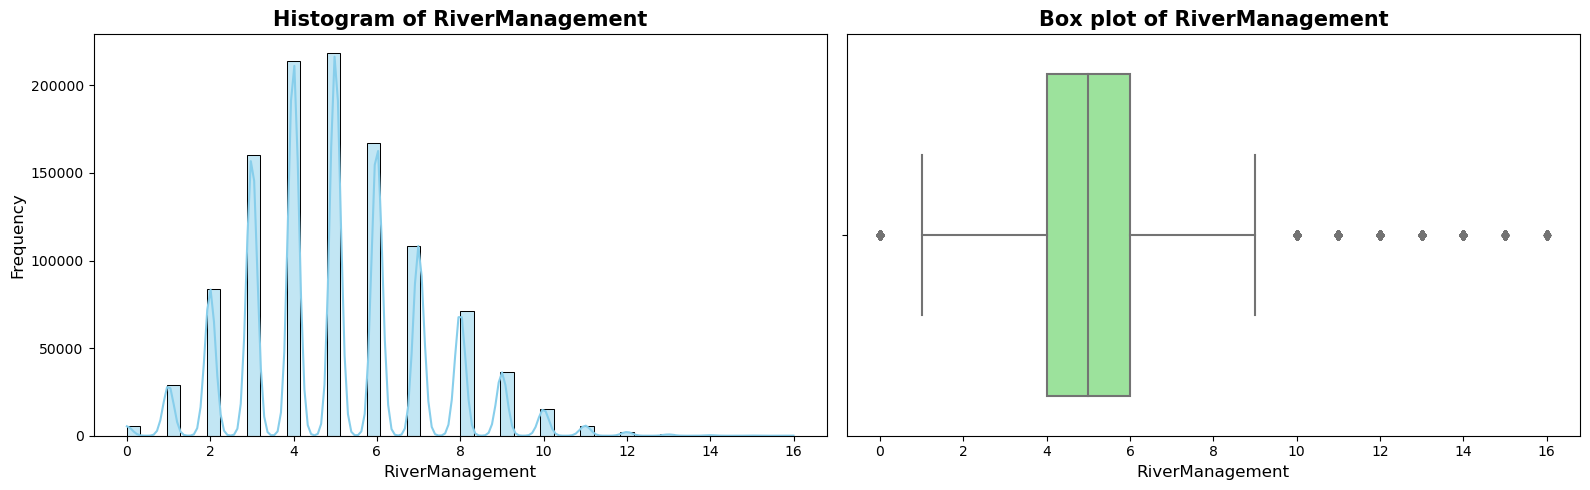

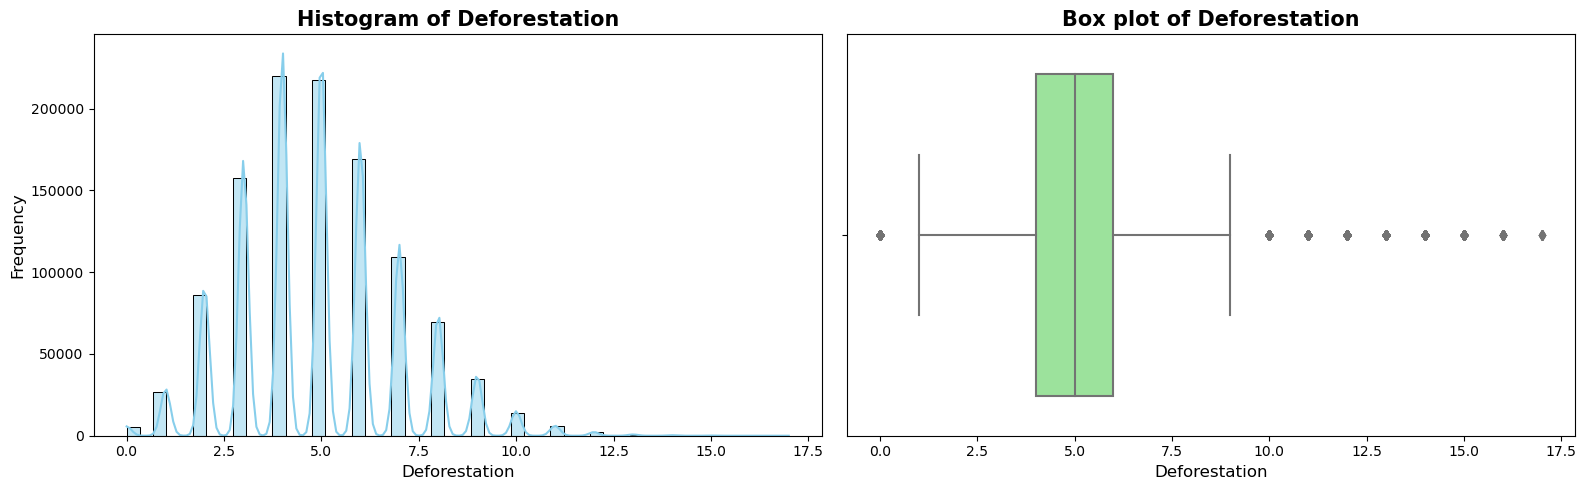

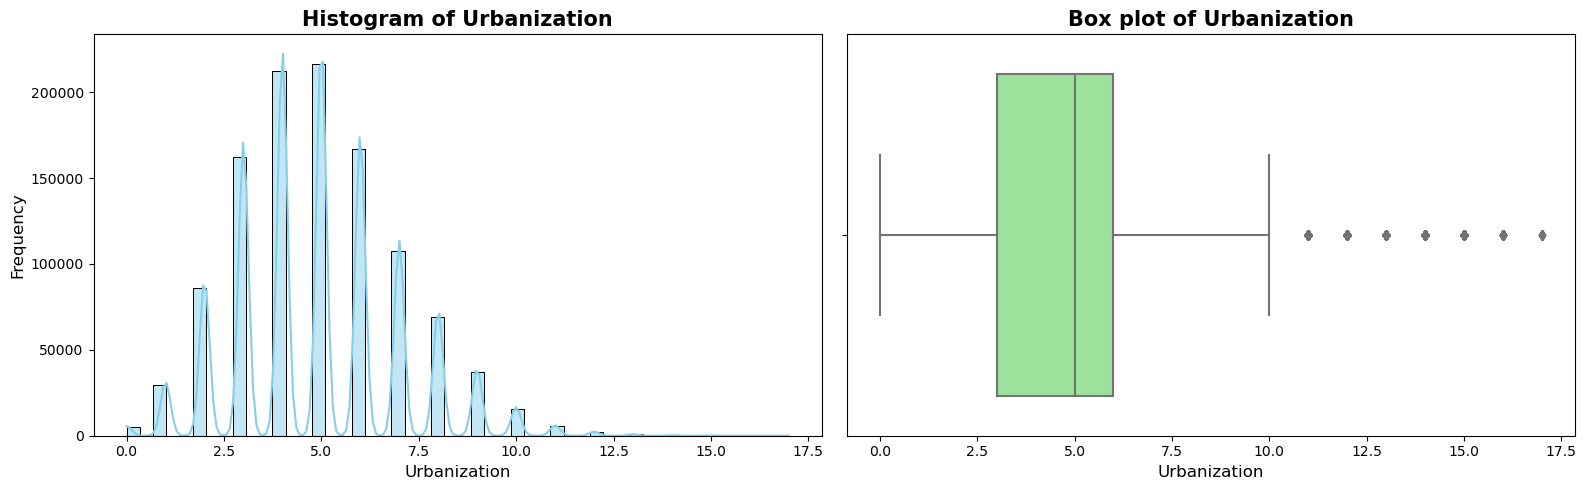

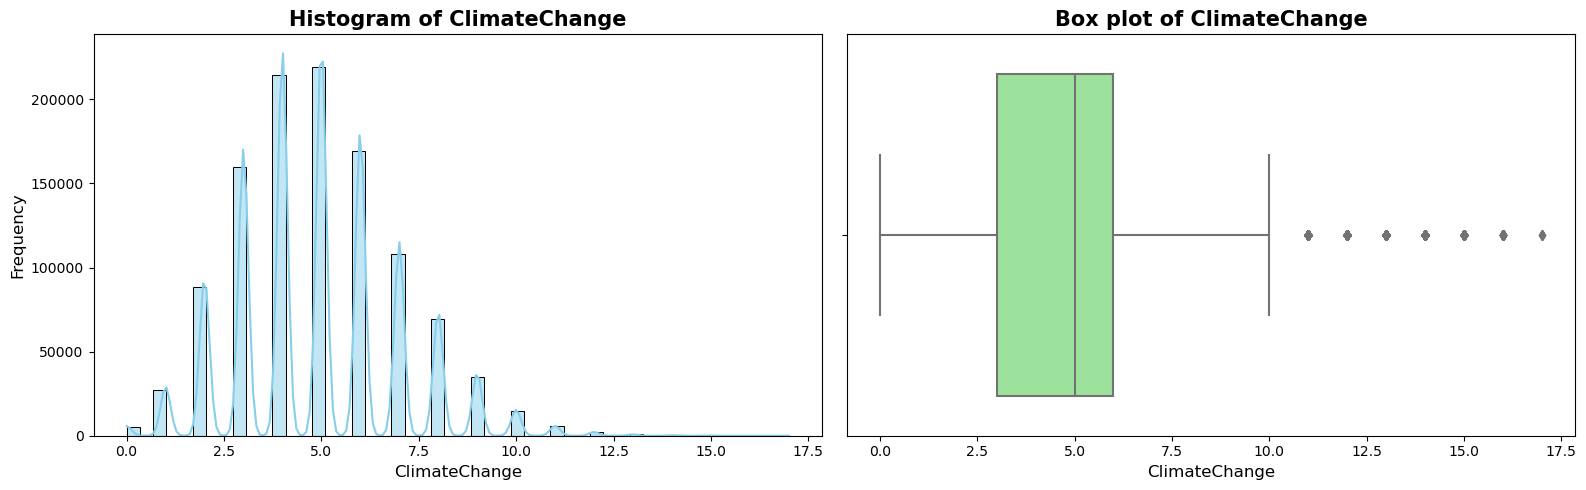

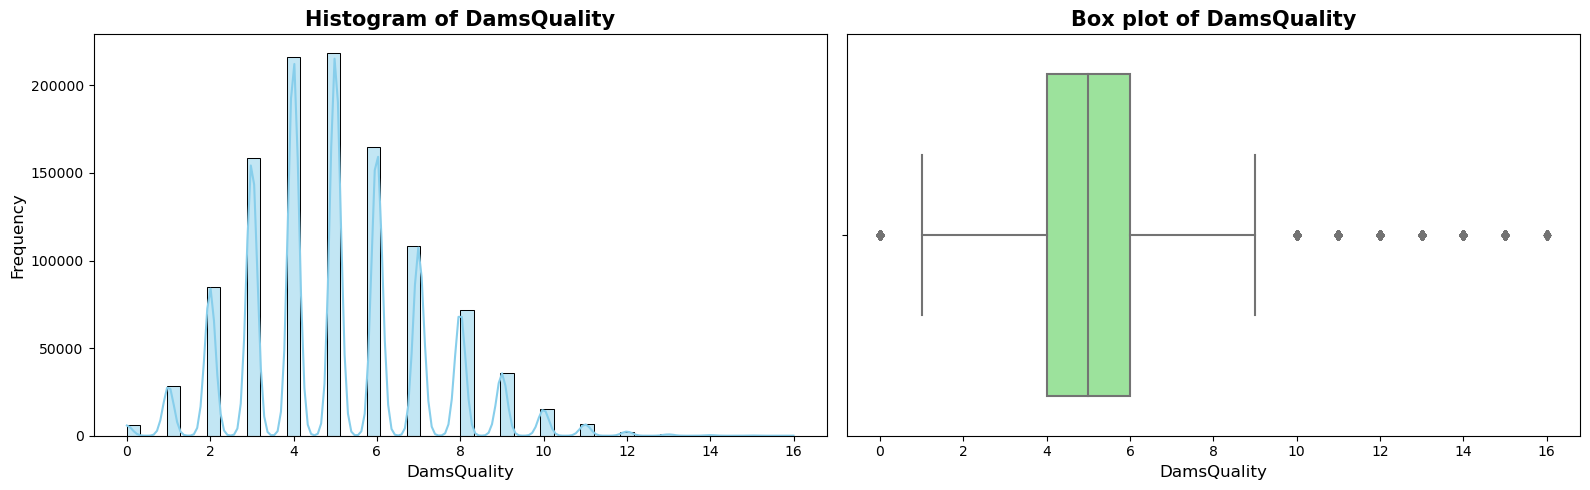

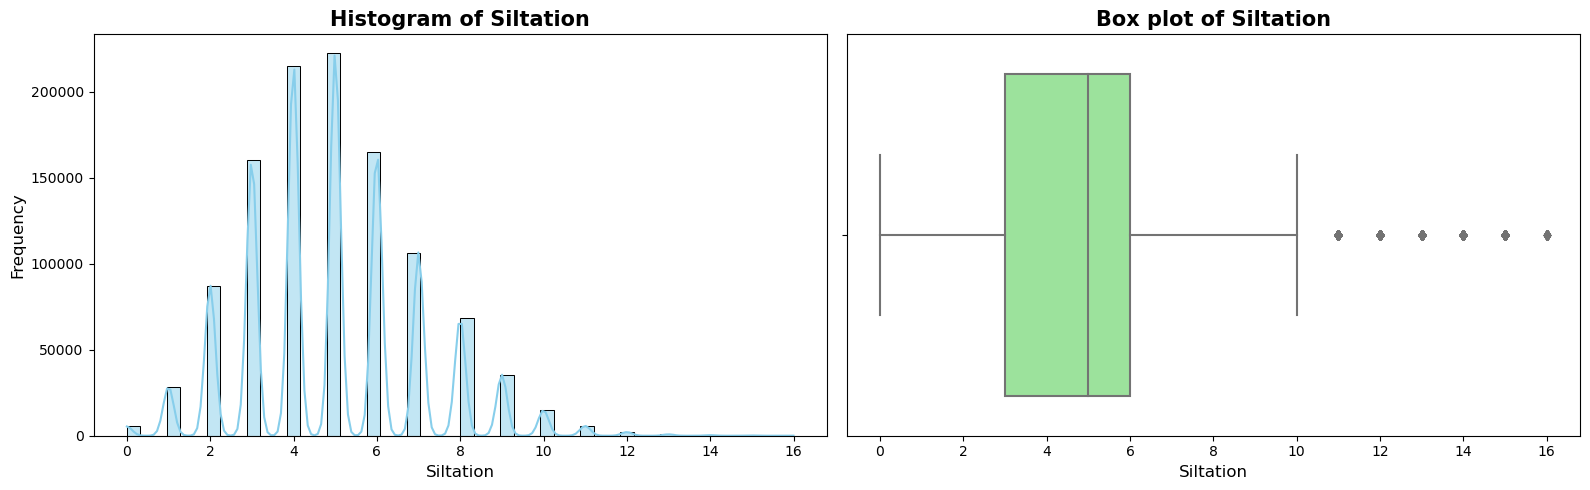

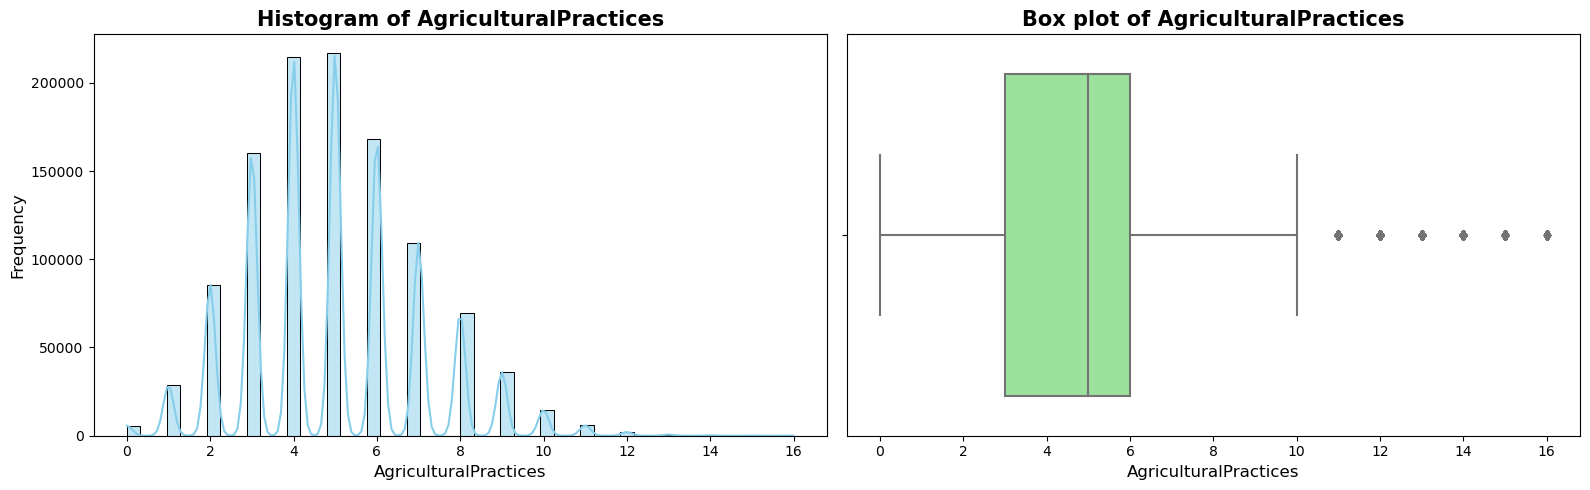

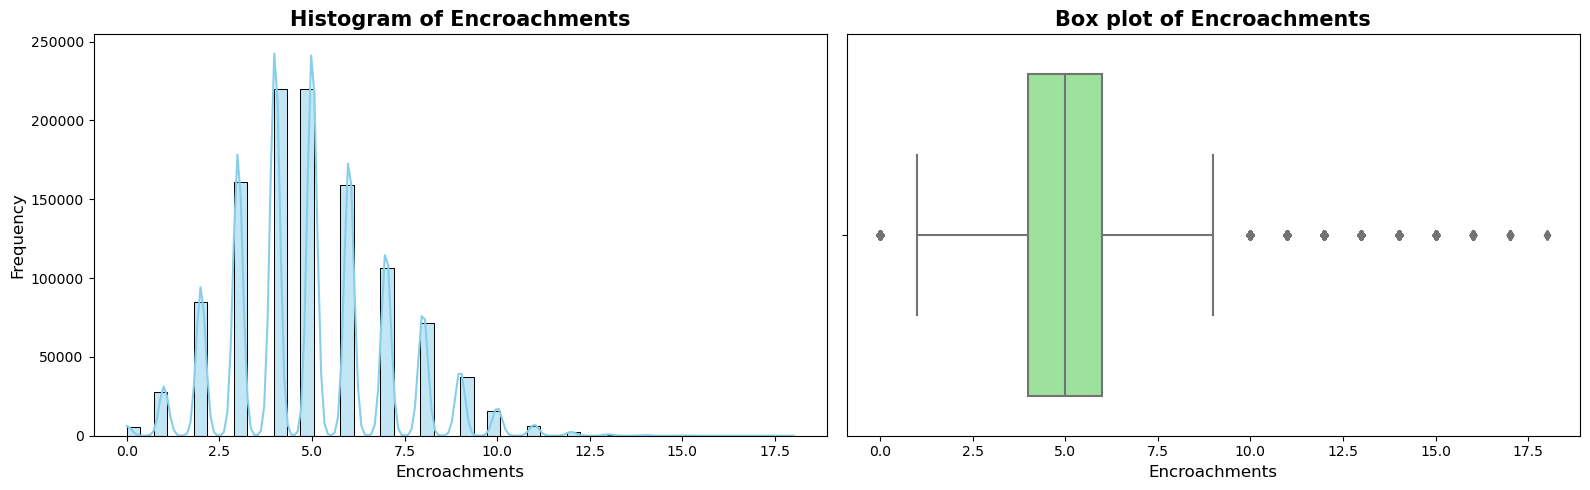

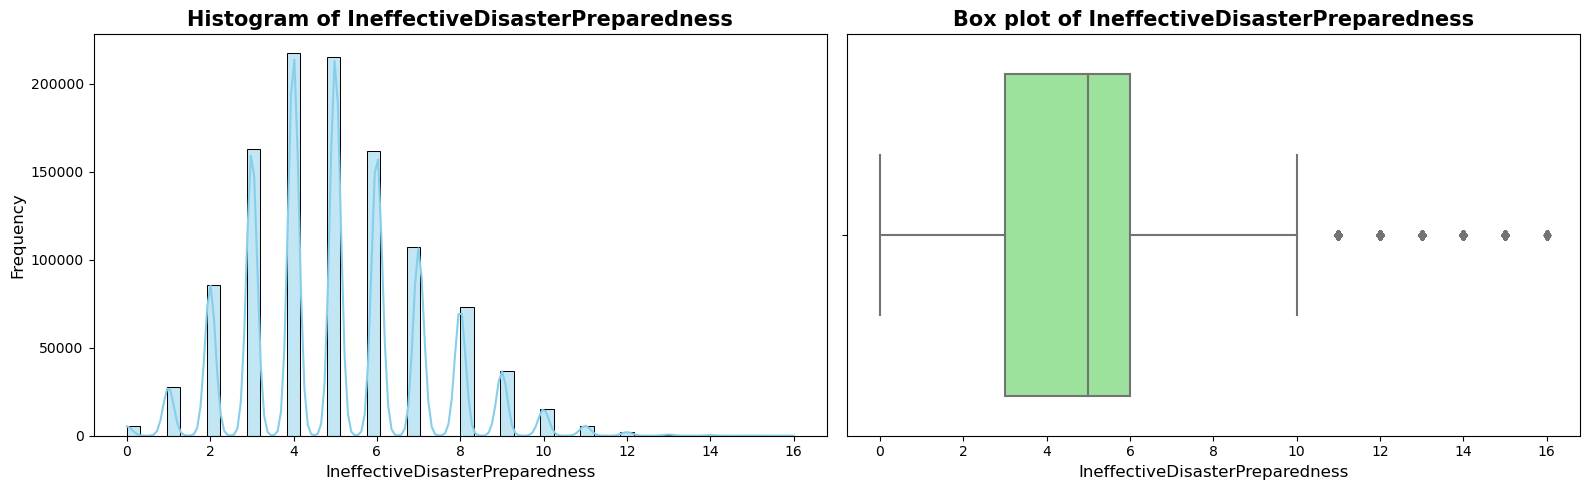

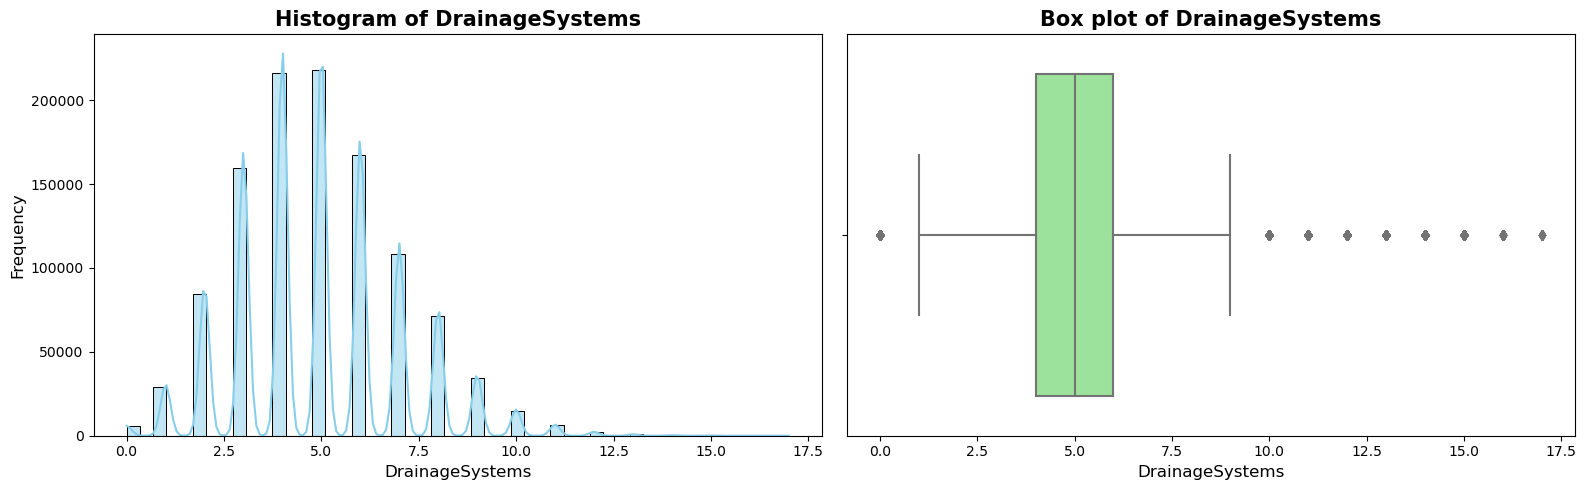

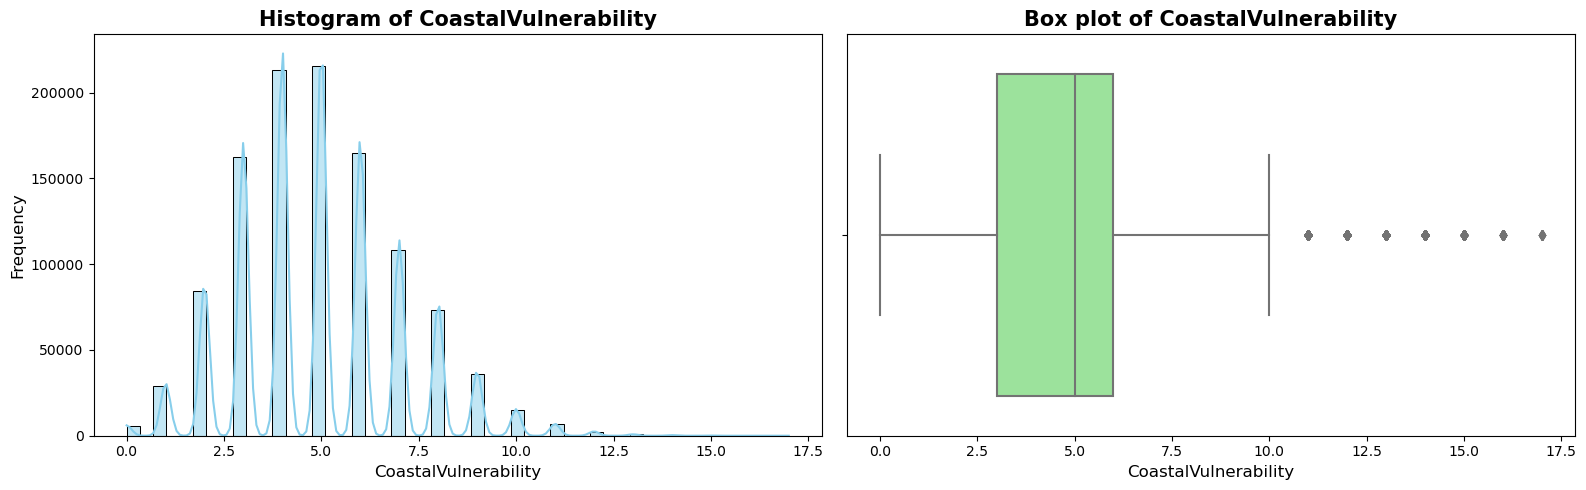

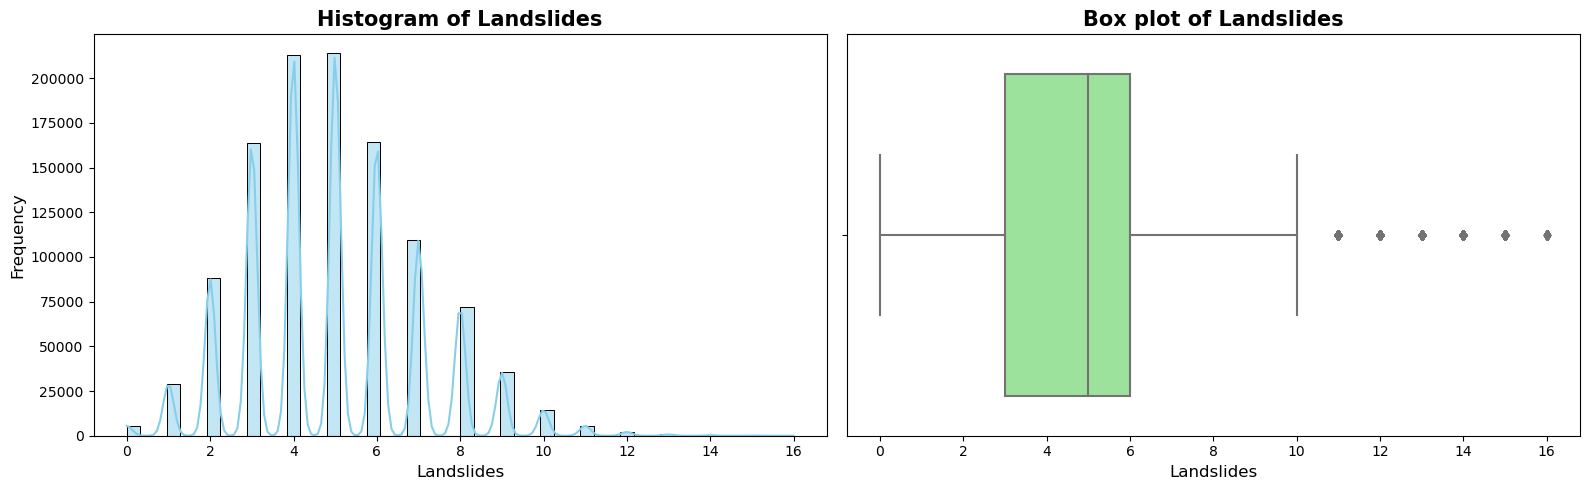

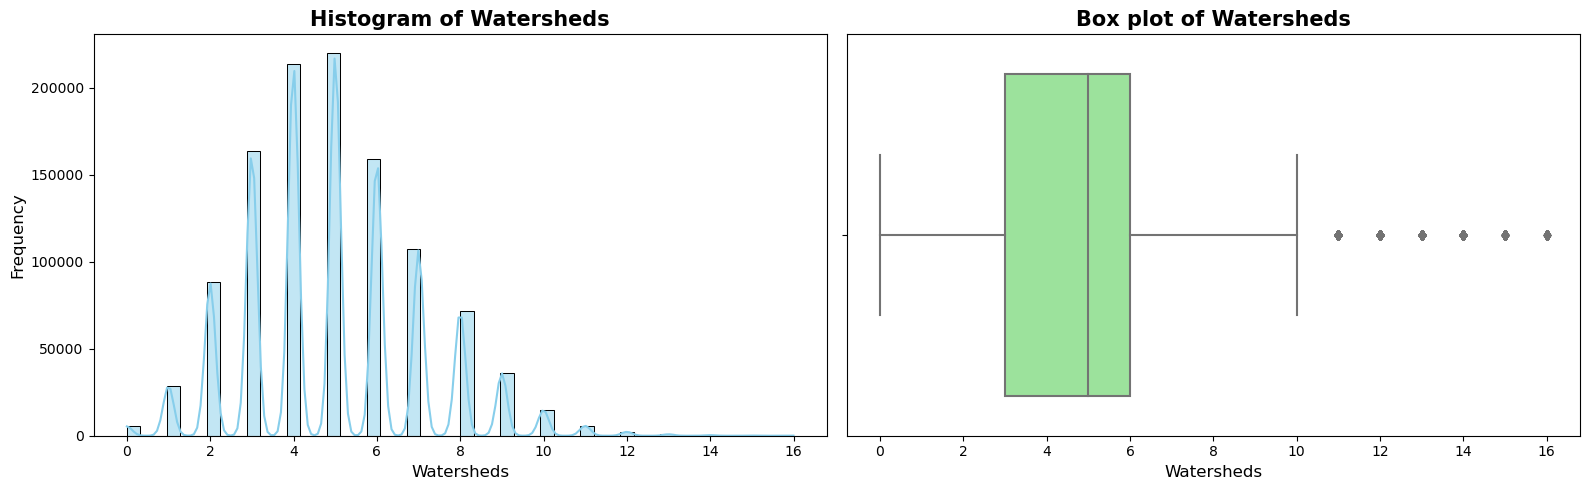

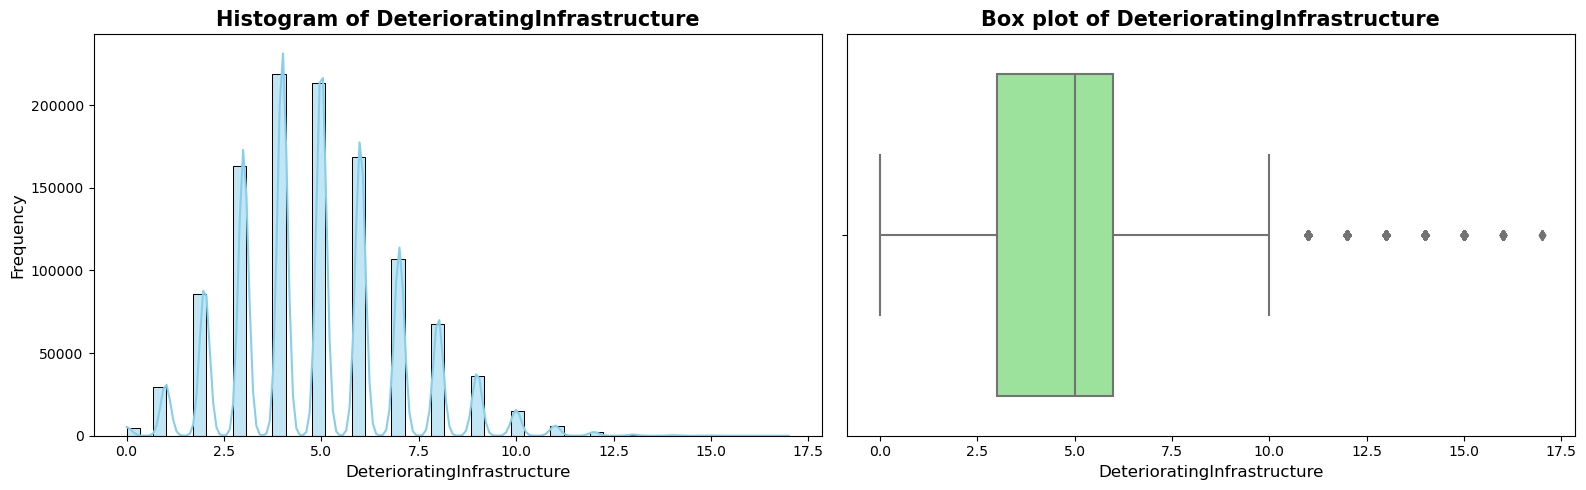

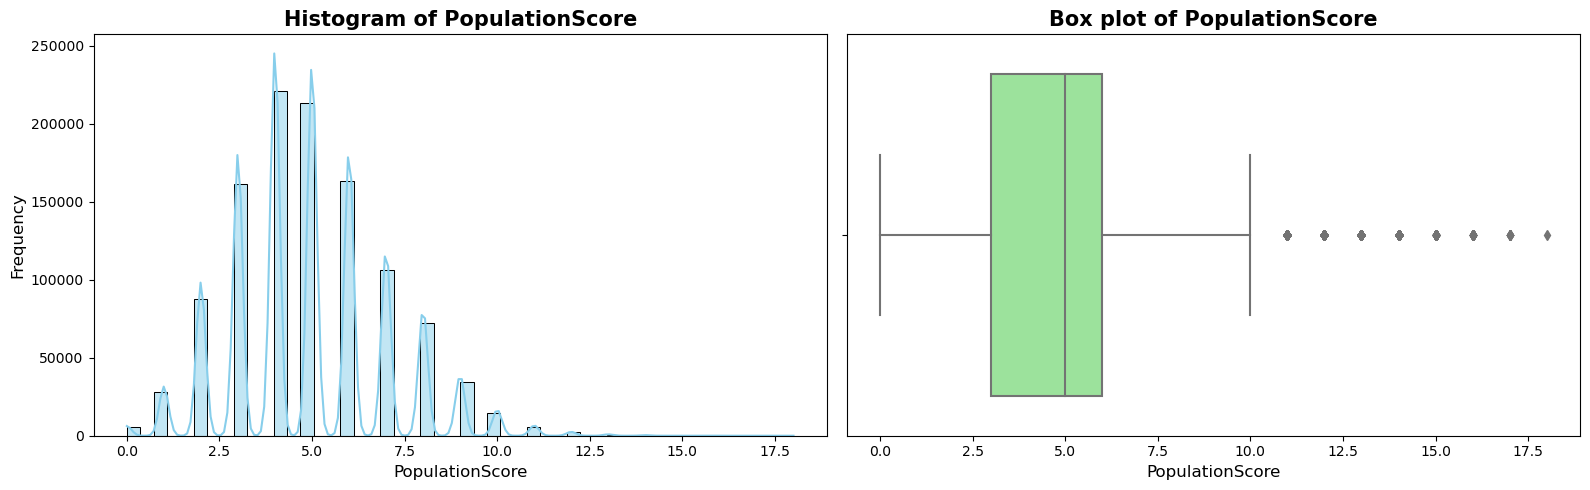

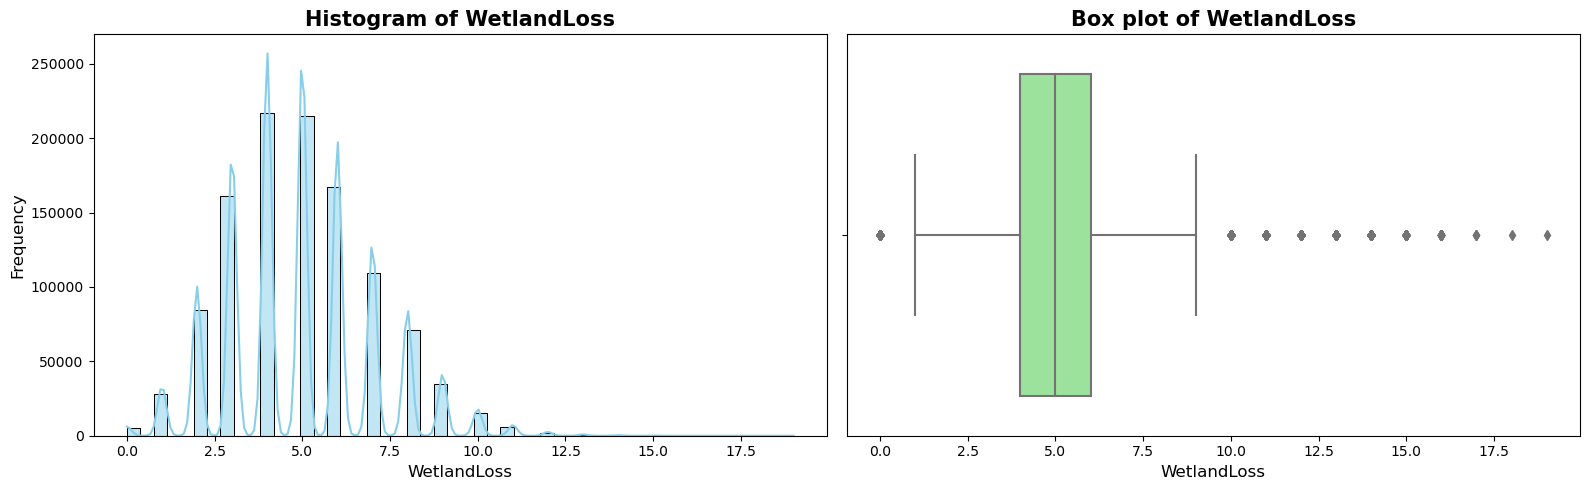

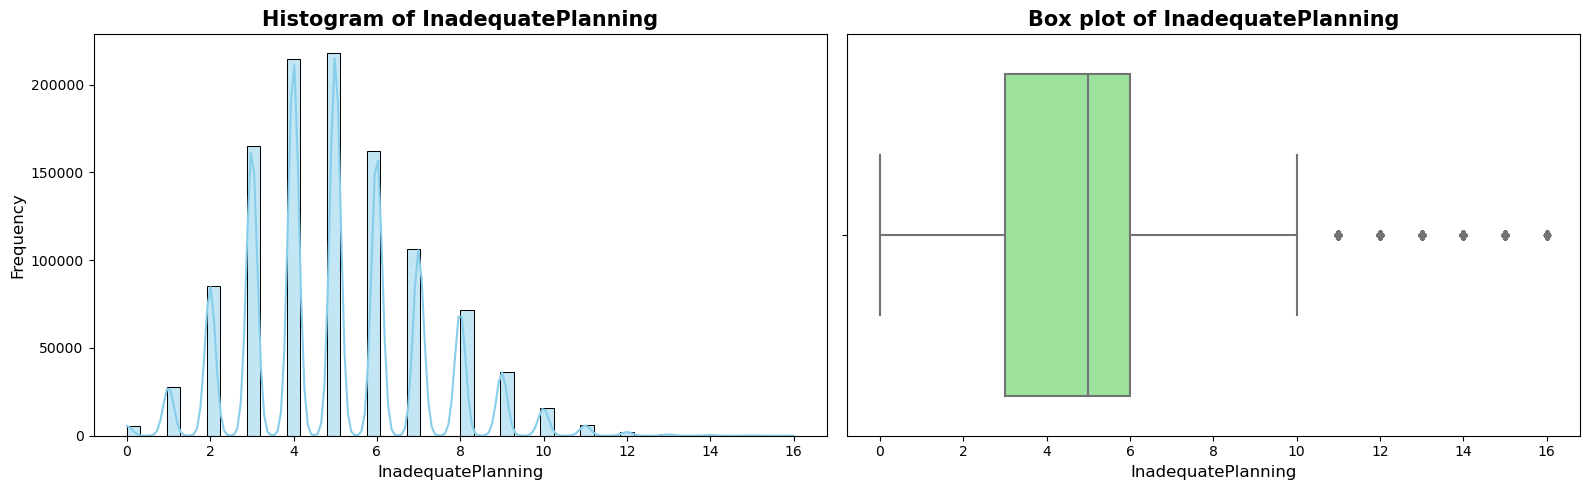

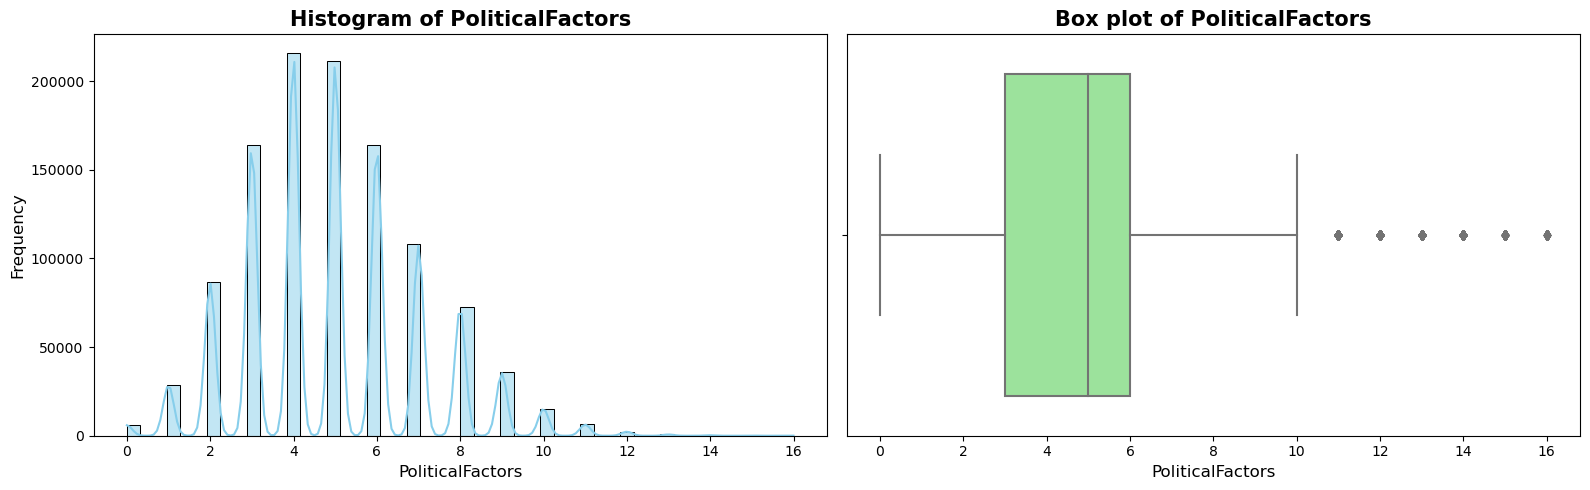

In [12]:
# PLOTTING NUMERIC VALUES 
num_cols=['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']

plot_numerics(df_train[num_cols])

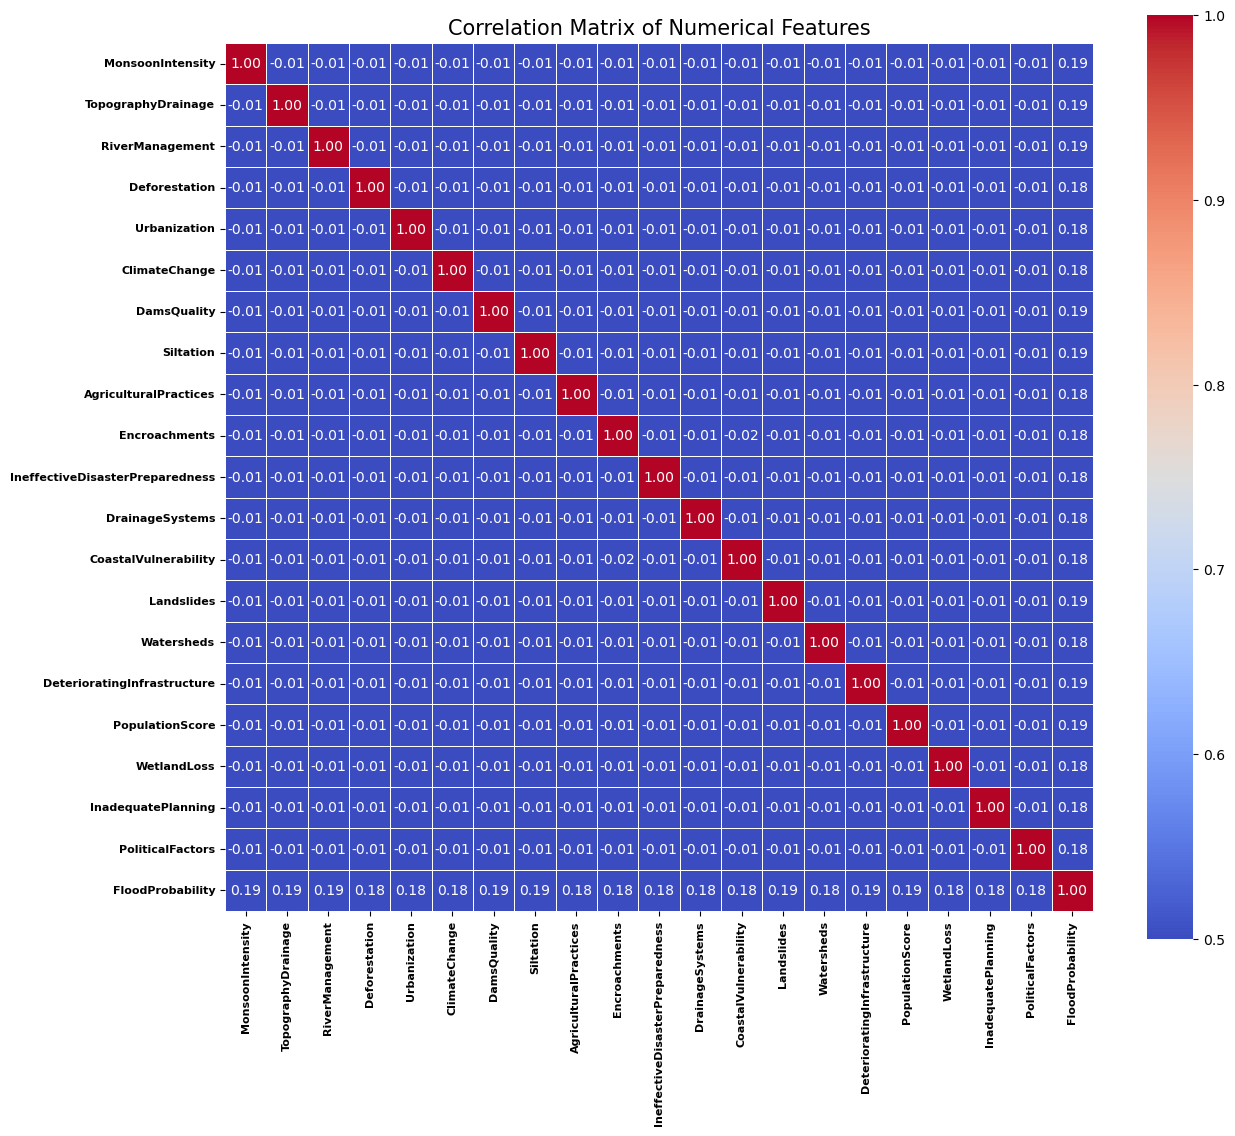

In [13]:
#CORRELATION MATRIX
corr_matrix = df_train[num_cols+['FloodProbability']].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, vmax=1, vmin=0.5, center=0.75,annot=True, fmt=".2f", square=True, 
            linewidths=.5, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.xticks(fontsize=8,fontweight='bold')
plt.yticks(fontsize=8,fontweight='bold')
plt.show()

# Feature Engineering

In [14]:
num_cols=['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']

unique_vals = []
for df in [df_train, df_test]:
    for col in num_cols:
        unique_vals += list(df[col].unique())

unique_vals = list(set(unique_vals))
# feature engr begins here
def getFeats(df):
    
    scaler = StandardScaler()
    
    df['total'] = df[num_cols].sum(axis=1)
    df['sum'] = (df[num_cols] ** 1.5).sum(axis=1)  
    df['mean'] = df[num_cols].mean(axis=1)
    df['median'] = df[num_cols].median(axis=1)
    df['max'] = df[num_cols].max(axis=1)
    df['min'] = df[num_cols].min(axis=1)
    df['fkurtosis'] = df[num_cols].kurtosis(axis=1)
    df['quant25'] = df[num_cols].quantile(0.25, axis=1)
    df['quant75'] = df[num_cols].quantile(0.75, axis=1)
    
    for v in unique_vals:
        df['cnt_{}'.format(v)] = (df[num_cols] == v).sum(axis=1)
    
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    return df

In [15]:
df_train['typ']=0
df_test['typ']=1
#
df_all=pd.concat([df_train,df_test],axis=0)
df_all=getFeats(df_all)
df_all.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,cnt_11,cnt_12,cnt_13,cnt_14,cnt_15,cnt_16,cnt_17,cnt_18,cnt_19,cnt_22
0,0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,...,0,0,0,0,0,0,0,0,0,0
1,1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,...,0,0,0,0,0,0,0,0,0,0
2,2,0.525633,0.034328,0.503280,1.002031,-0.931878,1.003786,-1.897287,0.034964,-0.455784,...,0,0,0,0,0,0,0,0,0,0
3,3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,...,0,0,0,0,0,0,0,0,0,0
4,4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_train=df_all[df_all['typ']==0]
df_test=df_all[df_all['typ']==1]
#
X=df_train.drop(['id','FloodProbability','typ'],axis=1)
y=df_train['FloodProbability']
#
feats=list(X.columns)
print(df_train)

              id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0              0          0.039335            1.467011         0.020654   
1              1          0.525633            0.989450        -0.461971   
2              2          0.525633            0.034328         0.503280   
3              3         -0.933262           -0.443233         0.503280   
4              4          0.039335           -0.920793        -1.427222   
...          ...               ...                 ...              ...   
1117952  1117952         -0.933262           -0.920793        -0.461971   
1117953  1117953         -1.419560           -1.398354        -0.461971   
1117954  1117954          1.011931           -0.920793         1.951156   
1117955  1117955          1.011931           -0.920793        -0.944596   
1117956  1117956         -0.446964            0.034328         0.503280   

         Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
0             1.4893

# Model Parameters

In [3]:
lgb_params = {
    'boosting_type': 'gbdt', 
    'n_estimators':2000, 
    'learning_rate' :  0.012, 
    'device':'gpu',
    'num_leaves' : 250, 
    'subsample_for_bin': 165700, 
    'min_child_samples': 114, 
    'reg_alpha': 2.075e-06, 
    'reg_lambda': 3.839e-07, 
    'colsample_bytree': 0.9634,
    'subsample': 0.9592, 
    'max_depth': 10,
    'random_state':0,
    'verbosity':-1}

xgb_params ={'n_estimators':5000,
             'max_depth': 10,
            'tree_method': 'gpu_hist',
             'learning_rate': 0.01,
             'random_state':0,
             }
             

cat_params ={'n_estimators':8000,
             'random_state':0,
             'learning_rate': 0.011277016304363601, 
             'depth': 8, 
             'subsample': 0.8675506657380021, 
             'colsample_bylevel': 0.7183884158632279, 
             'min_data_in_leaf': 98
            }

# Model Functions

In [2]:
## Function for Cross Validation
def cross_val_train(X,y,df_test,params,mName):
    
    spl=5
    test_preds = np.zeros((len(df_test)))
    val_preds = np.zeros((len(X)))
    val_scores, train_scores = [],[]
    
    cv = KFold(spl, shuffle=True, random_state=42)
    
    for fold, (train_ind, valid_ind) in enumerate(cv.split(X,y)):
        
        X_train = X.iloc[train_ind]
        y_train = y[train_ind]
        X_val = X.iloc[valid_ind]
        y_val = y[valid_ind]
        
        if mName=='LGB':
            model = lgb.LGBMRegressor(**params)
            model.fit(X_train, y_train,
                        eval_set=[(X_val, y_val)],
                        callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(100)]) 
            
        if mName=='XGB':
            model = XGBRegressor(**params)   
            model.fit(X_train, y_train,
                              eval_set=[(X_train, y_train), (X_val, y_val)],
                              early_stopping_rounds=50,
                              verbose=100)
            
        if mName=='CAT':
            model = CatBoostRegressor(**params)   
            model.fit(X_train, y_train,
                              eval_set=[(X_train, y_train), (X_val, y_val)],
                              early_stopping_rounds=50,
                              verbose=100)
        
        y_pred_trn=model.predict(X_train)
        y_pred_val=model.predict(X_val)
        train_r2 = r2_score(y_train, y_pred_trn)
        val_r2 = r2_score(y_val, y_pred_val)
        print("Fold:",fold, " Train R2:",np.round(train_r2,5), " Val R2:",np.round(val_r2,5))
        
        test_preds += model.predict(df_test[feats])/spl
        val_preds[valid_ind] = model.predict(X_val)
        val_scores.append(val_r2)
        print("-"*50)
        
    return val_scores, val_preds, test_preds

# Evaluate the model
def modelEval(y,val_preds):
    mse = mean_squared_error(y,val_preds)
    rmse = np.sqrt(mean_squared_error(y, val_preds))
    r2 = r2_score(y, val_preds)
    #
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}')

# Model Training

## CAT

In [4]:
val_scores_cat, val_preds_cat, test_preds_cat=cross_val_train(X,y,df_test,cat_params,'CAT')

NameError: name 'X' is not defined

In [ ]:
# Evaluate the model
modelEval(y,val_preds_cat)

MSE: 0.000340733091774934
RMSE: 0.01845895695251858
R2: 0.8691330350501716


## LGB

In [ ]:
val_scores_lgb, val_preds_lgb, test_preds_lgb=cross_val_train(X,y,df_test,lgb_params,'LGB')

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 0.000542268
[200]	valid_0's l2: 0.000358401
[300]	valid_0's l2: 0.000341937
[400]	valid_0's l2: 0.000340401
[500]	valid_0's l2: 0.000340241
Early stopping, best iteration is:
[516]	valid_0's l2: 0.000340237
Fold: 0  Train R2: 0.8722  Val R2: 0.8691
--------------------------------------------------
Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 0.00054401
[200]	valid_0's l2: 0.000358603
[300]	valid_0's l2: 0.000341666
[400]	valid_0's l2: 0.000339971
[500]	valid_0's l2: 0.000339764
Early stopping, best iteration is:
[529]	valid_0's l2: 0.000339755
Fold: 1  Train R2: 0.87214  Val R2: 0.86973
--------------------------------------------------
Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 0.000544961
[200]	valid_0's l2: 0.000359948
[300]	valid_0's l2: 0.000343163
[400]	valid_0's l2: 0.000341537
[500]	valid_0's l2: 0.000341386
Early stopping, 

In [ ]:
# Evaluate the model
modelEval(y,val_preds_lgb)

MSE: 0.0003403256286591215
RMSE: 0.01844791664820506
R2: 0.8692895313300533


## XGB

In [ ]:
val_scores_xgb, val_preds_xgb, test_preds_xgb=cross_val_train(X,y,df_test,xgb_params,'XGB')

[0]	validation_0-rmse:0.05059	validation_1-rmse:0.05054
[100]	validation_0-rmse:0.02520	validation_1-rmse:0.02524
[200]	validation_0-rmse:0.01935	validation_1-rmse:0.01951
[300]	validation_0-rmse:0.01835	validation_1-rmse:0.01860
[400]	validation_0-rmse:0.01815	validation_1-rmse:0.01848
[500]	validation_0-rmse:0.01806	validation_1-rmse:0.01846
[600]	validation_0-rmse:0.01799	validation_1-rmse:0.01846
[635]	validation_0-rmse:0.01797	validation_1-rmse:0.01846
Fold: 0  Train R2: 0.87554  Val R2: 0.86885
--------------------------------------------------
[0]	validation_0-rmse:0.05057	validation_1-rmse:0.05063
[100]	validation_0-rmse:0.02520	validation_1-rmse:0.02529
[200]	validation_0-rmse:0.01935	validation_1-rmse:0.01952
[300]	validation_0-rmse:0.01835	validation_1-rmse:0.01860
[400]	validation_0-rmse:0.01815	validation_1-rmse:0.01847
[500]	validation_0-rmse:0.01807	validation_1-rmse:0.01845
[600]	validation_0-rmse:0.01800	validation_1-rmse:0.01845
[637]	validation_0-rmse:0.01798	validat

In [ ]:
# Evaluate the model
modelEval(y,val_preds_xgb)

MSE: 0.0003409744152786592
RMSE: 0.018465492554455707
R2: 0.8690403487943722


# Ensemble

In [ ]:
val_preds = val_preds_lgb*0.6 + val_preds_xgb*0.3 + val_preds_cat*0.1
test_preds = test_preds_lgb*0.6 + test_preds_xgb*0.3 + test_preds_cat*0.1

In [ ]:
# Evaluate the Ensemble
modelEval(y,val_preds)

MSE: 0.00034023327865989465
RMSE: 0.01844541348573934
R2: 0.869325000629642


# Plot Residuals

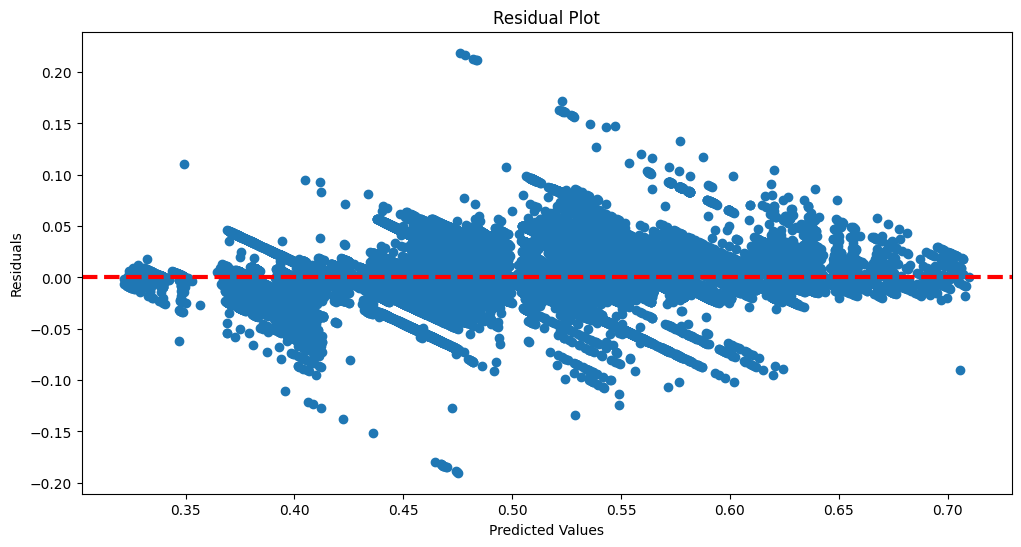

In [ ]:
plt.figure(figsize=(12,6))
# Calculate residuals
residuals = y - val_preds
# Plot residuals
plt.scatter(val_preds, residuals)
plt.axhline(y=0, color='red', linestyle='--',linewidth=3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

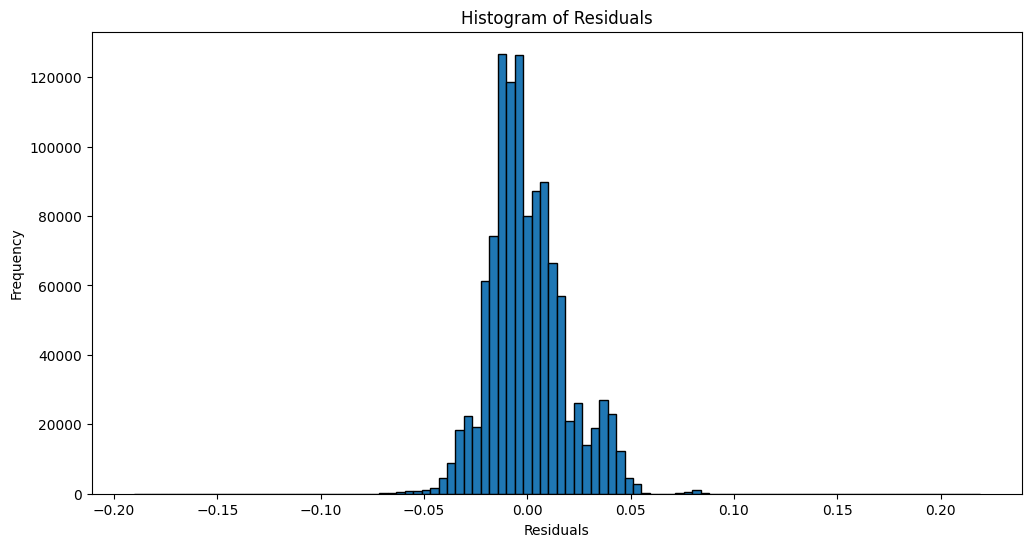

In [ ]:
# Plot histogram of residuals
plt.figure(figsize=(12,6))
plt.hist(residuals, bins=100, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Submission

In [ ]:
sub=sample_sub[['id']]
sub['FloodProbability'] = test_preds
sub.to_csv('submission.csv', index=False)
sub.head()

,id,FloodProbability
0,1117957,0.578109
1,1117958,0.455906
2,1117959,0.449648
3,1117960,0.466412
4,1117961,0.466381
